In [2]:
from langchain_openai import ChatOpenAI
from pydantic import BaseModel, Field
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import display, Image

llm = ChatOpenAI(model = "gpt-4o-mini", temperature = 0.2)

In [5]:
class State(TypedDict):
    topic: str
    joke: str
    story: str
    poem: str
    combined_output: str


def create_joke(state:State):
    msg = llm.invoke(f'Write a short joke about {state["topic"]}')
    return {"joke": msg.content}

def create_story(state:State):
    msg = llm.invoke(f'Write a short story about {state["topic"]}')
    return {"story": msg.content}

def create_poem(state:State):
    msg = llm.invoke(f'Write a short poem about {state["topic"]}')
    return {"poem": msg.content}

def aggregator(state: State):
    msg = llm.invoke(f'Combine the following into a single output: {state["joke"]}, {state["story"]}, {state["poem"]}')
    return {"combined_output": msg.content}

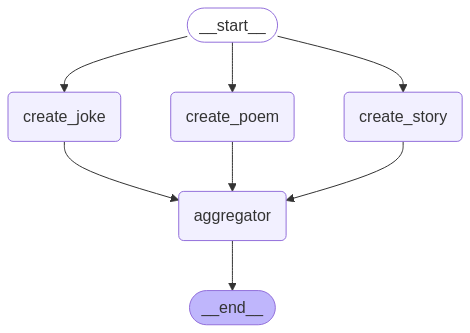

In [6]:
paraller_builder = StateGraph(State)

paraller_builder.add_node("create_joke", create_joke)
paraller_builder.add_node("create_story", create_story)
paraller_builder.add_node("create_poem", create_poem)
paraller_builder.add_node("aggregator", aggregator)

paraller_builder.add_edge(START, "create_joke")
paraller_builder.add_edge(START, "create_story")
paraller_builder.add_edge(START, "create_poem")
paraller_builder.add_edge("create_joke", "aggregator")
paraller_builder.add_edge("create_story", "aggregator")
paraller_builder.add_edge("create_poem", "aggregator")
paraller_builder.add_edge("aggregator", END)
parallel_workflow = paraller_builder.compile()

display(Image(parallel_workflow.get_graph().draw_mermaid_png()))

In [ ]:
from pprint import pprint
from langfuse.callback import CallbackHandler
langfuse_handler = CallbackHandler()

# state = parallel_workflow.invoke({"topic": "cats"}, config={"callbacks": [langfuse_handler]})
